In [30]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [31]:
import tensorflow.keras
tensorflow.keras.__version__

'2.3.0-tf'

In [32]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

IMDB 데이터셋에서처럼 num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 10,000개로 제한합니다.

여기에는 8,982개의 훈련 샘플과 2,246개의 테스트 샘플이 있습니다:

In [33]:
len(train_data)

8982

In [34]:
len(test_data)

2246

IMDB 리뷰처럼 각 샘플은 정수 리스트입니다(단어 인덱스):

In [35]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

궁금한 경우를 위해 어떻게 단어로 디코딩하는지 알아보겠습니다:

In [36]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [37]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수입니다.

In [38]:
train_labels[10]

3

In [39]:
from tensorflow.keras.preprocessing import sequence
maxlen = 500
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)
print('input_train 크기:', train_data.shape)
print('input_test 크기:', test_data.shape)

input_train 크기: (8982, 500)
input_test 크기: (2246, 500)


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(10000, 50))
model.add(SimpleRNN(50))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=50,
                    validation_split=0.2)

Epoch 1/10
144/144 [==============================] - 19s 134ms/step - loss: 2.5128 - acc: 0.3535 - val_loss: 2.1913 - val_acc: 0.4268
Epoch 2/10
144/144 [==============================] - 21s 143ms/step - loss: 2.0830 - acc: 0.4632 - val_loss: 2.0236 - val_acc: 0.4791
Epoch 3/10
144/144 [==============================] - 23s 159ms/step - loss: 1.9879 - acc: 0.4809 - val_loss: 1.9679 - val_acc: 0.4947
Epoch 4/10
144/144 [==============================] - 31s 212ms/step - loss: 1.8428 - acc: 0.5222 - val_loss: 1.8600 - val_acc: 0.5209
Epoch 5/10
144/144 [==============================] - 38s 265ms/step - loss: 1.6778 - acc: 0.5617 - val_loss: 1.7639 - val_acc: 0.5431
Epoch 6/10
144/144 [==============================] - 30s 205ms/step - loss: 1.5445 - acc: 0.6011 - val_loss: 1.8017 - val_acc: 0.5348
Epoch 7/10
144/144 [==============================] - 24s 168ms/step - loss: 1.3971 - acc: 0.6430 - val_loss: 1.8199 - val_acc: 0.5348
Epoch 8/10
144/144 [==============================] - 2

In [41]:
import matplotlib.pyplot as plt

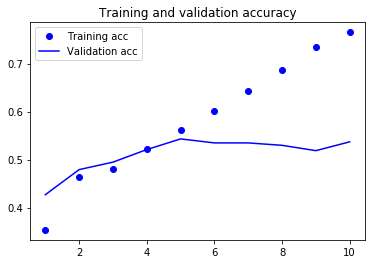

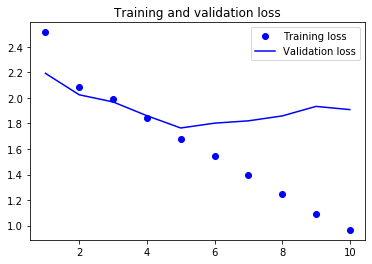

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
model = Sequential()
model.add(Embedding(10000, 50))
model.add(SimpleRNN(50))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels,
                    epochs=5,
                    batch_size=50,
                    validation_split=0.2)

Epoch 1/5
144/144 [==============================] - 20s 139ms/step - loss: 2.4935 - acc: 0.3608 - val_loss: 2.2151 - val_acc: 0.4430
Epoch 2/5
144/144 [==============================] - 24s 165ms/step - loss: 2.1013 - acc: 0.4674 - val_loss: 2.0333 - val_acc: 0.4775
Epoch 3/5
144/144 [==============================] - 30s 207ms/step - loss: 2.1241 - acc: 0.4536 - val_loss: 2.0190 - val_acc: 0.4769
Epoch 4/5
144/144 [==============================] - 47s 323ms/step - loss: 1.7912 - acc: 0.5324 - val_loss: 1.8342 - val_acc: 0.5198
Epoch 5/5
144/144 [==============================] - 30s 212ms/step - loss: 1.6266 - acc: 0.5777 - val_loss: 1.8443 - val_acc: 0.5125


In [44]:
model.fit(train_data, train_labels, epochs=5, batch_size=50)
results = model.evaluate(test_data, test_labels)

Epoch 1/5
180/180 [==============================] - 22s 123ms/step - loss: 1.5460 - acc: 0.6075
Epoch 2/5
180/180 [==============================] - 25s 138ms/step - loss: 1.3983 - acc: 0.6465
Epoch 3/5
180/180 [==============================] - 29s 161ms/step - loss: 1.2250 - acc: 0.6878
Epoch 4/5
180/180 [==============================] - 44s 245ms/step - loss: 1.0681 - acc: 0.7302
Epoch 5/5
71/71 [==============================] - 2s 35ms/step - loss: 1.9705 - acc: 0.5374


In [45]:
results

[1.9705054759979248, 0.5373998284339905]

In [46]:
model.predict(test_data)

array([[1.28225042e-02, 1.48833513e-01, 2.00021919e-02, ...,
        3.61512834e-03, 2.07572407e-03, 1.62864092e-03],
       [7.97240902e-03, 1.02870315e-01, 1.76936500e-02, ...,
        1.26740588e-02, 4.04357957e-03, 4.16964758e-03],
       [9.06775426e-03, 3.69108059e-02, 3.30457687e-02, ...,
        1.44817019e-02, 1.64800230e-02, 7.49783358e-03],
       ...,
       [8.96525671e-06, 5.32511855e-04, 7.04295599e-05, ...,
        1.38012720e-05, 1.08017630e-05, 7.59338263e-06],
       [1.13922183e-03, 4.61591734e-03, 1.43887103e-03, ...,
        1.24078372e-03, 4.40090941e-03, 1.52262452e-03],
       [2.14301590e-02, 7.33189732e-02, 2.91542765e-02, ...,
        3.35014286e-03, 2.37854407e-03, 6.38165325e-03]], dtype=float32)